In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

2023-09-17 13:52:22.043976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#!wget --no-check-certificate \
#    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
#    -O /tmp/songdata.csv

In [3]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [4]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [5]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [6]:
corpus = create_lyrics_corpus(dataset,'text')
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

/var/folders/01/v1qj51yd35d93xs2n4_9qms80000gn/T/ipykernel_36810/1476050029.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')


In [7]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [8]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [9]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [10]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

2023-09-17 13:57:13.924071: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
62/62 [==============================] - 3s 13ms/step - loss: 5.9770 - accuracy: 0.0272
Epoch 2/200
62/62 [==============================] - 1s 12ms/step - loss: 5.4330 - accuracy: 0.0373
Epoch 3/200
62/62 [==============================] - 1s 11ms/step - loss: 5.3642 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 1s 11ms/step - loss: 5.3097 - accuracy: 0.0388
Epoch 5/200
62/62 [==============================] - 1s 12ms/step - loss: 5.2389 - accuracy: 0.0409
Epoch 6/200
62/62 [==============================] - 1s 12ms/step - loss: 5.1621 - accuracy: 0.0499
Epoch 7/200
62/62 [==============================] - 1s 14ms/step - loss: 5.0901 - accuracy: 0.0479
Epoch 8/200
62/62 [==============================] - 1s 14ms/step - loss: 5.0122 - accuracy: 0.0505
Epoch 9/200
62/62 [==============================] - 1s 12ms/step - loss: 4.9308 - accuracy: 0.0585
Epoch 10/200
62/62 [==============================] - 1s 10ms/step - loss: 4.8462 - accuracy: 0.0737

62/62 [==============================] - 1s 9ms/step - loss: 1.4336 - accuracy: 0.6963
Epoch 83/200
62/62 [==============================] - 1s 9ms/step - loss: 1.4096 - accuracy: 0.7038
Epoch 84/200
62/62 [==============================] - 1s 9ms/step - loss: 1.3774 - accuracy: 0.7164
Epoch 85/200
62/62 [==============================] - 1s 11ms/step - loss: 1.3754 - accuracy: 0.7038
Epoch 86/200
62/62 [==============================] - 1s 13ms/step - loss: 1.3389 - accuracy: 0.7210
Epoch 87/200
62/62 [==============================] - 1s 11ms/step - loss: 1.3264 - accuracy: 0.7210
Epoch 88/200
62/62 [==============================] - 1s 9ms/step - loss: 1.3209 - accuracy: 0.7175
Epoch 89/200
62/62 [==============================] - 1s 9ms/step - loss: 1.3039 - accuracy: 0.7200
Epoch 90/200
62/62 [==============================] - 1s 9ms/step - loss: 1.3165 - accuracy: 0.7210
Epoch 91/200
62/62 [==============================] - 1s 9ms/step - loss: 1.3118 - accuracy: 0.7164
Epoch 92/2

62/62 [==============================] - 1s 12ms/step - loss: 0.6337 - accuracy: 0.8502
Epoch 164/200
62/62 [==============================] - 1s 13ms/step - loss: 0.6051 - accuracy: 0.8557
Epoch 165/200
62/62 [==============================] - 1s 12ms/step - loss: 0.5851 - accuracy: 0.8623
Epoch 166/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5750 - accuracy: 0.8623
Epoch 167/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5712 - accuracy: 0.8678
Epoch 168/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5671 - accuracy: 0.8673
Epoch 169/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5934 - accuracy: 0.8532
Epoch 170/200
62/62 [==============================] - 1s 10ms/step - loss: 0.6131 - accuracy: 0.8507
Epoch 171/200
62/62 [==============================] - 1s 10ms/step - loss: 0.6165 - accuracy: 0.8517
Epoch 172/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5823 - accuracy: 0

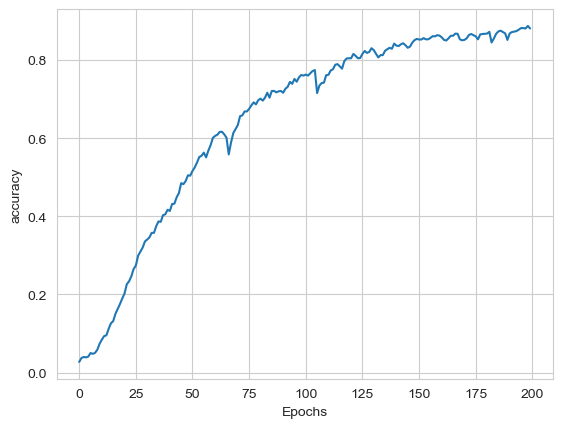

In [12]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graphs(history,'accuracy')

In [13]:
seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],p=predicted_probs)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
i m feeling chills me mad such this guy closing im your front door rain rain so walk pain advice at makes like me more song and it back and i didnt thought theyre evening ground touch bone theyre way final street and start theyre deal rotten butterflies soft soft soft weave weave weave learn final mistake rotten bone tiny would weave joe rotten bone linger ways seeing song song part i misunderstood andante i misunderstood andante fine to about i life youve cassandra you didnt had hate a beg good think you thank would knew knew life darkest song heartaches better night eye
